<a href="https://colab.research.google.com/github/logeshj24bai035/project/blob/main/logesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("creditcard.csv", header=None)

print("✔ Dataset Loaded Successfully!\n")
print(df.head())

✔ Dataset Loaded Successfully!

     0                   1                    2                 3   \
0  Time                  V1                   V2                V3   
1     0    -1.3598071336738  -0.0727811733098497  2.53634673796914   
2     0    1.19185711131486     0.26615071205963  0.16648011335321   
3     1   -1.35835406159823    -1.34016307473609  1.77320934263119   
4     1  -0.966271711572087   -0.185226008082898  1.79299333957872   

                   4                    5                    6   \
0                  V4                   V5                   V6   
1    1.37815522427443   -0.338320769942518    0.462387777762292   
2   0.448154078460911   0.0600176492822243  -0.0823608088155687   
3   0.379779593034328   -0.503198133318193     1.80049938079263   
4  -0.863291275036453  -0.0103088796030823     1.24720316752486   

                    7                   8                   9   ...  \
0                   V7                  V8                  V9  ...   
1 

/tmp/ipython-input-635120494.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("creditcard.csv", header=None)


In [ ]:
df = pd.read_csv("creditcard.csv", header=None)

print("✔ Dataset Loaded Successfully!\n")

# Extract the header from the first row and assign it as column names
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True) # Drop the first row (header now) and reset index

# The last column is assumed to be the target variable (fraud column)
# Assuming 'Class' is the name of the last column based on the head output
y = df['Class']
X = df.drop(columns=['Class'])

# Convert y to numeric, coercing errors to NaN
y = pd.to_numeric(y, errors='coerce')

# For X, convert all columns to numeric where possible.
# This will handle the DtypeWarning for other columns like 'Time', 'Amount' and V columns
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns # Should be empty after conversion

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

/tmp/ipython-input-194817281.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("creditcard.csv", header=None)


✔ Dataset Loaded Successfully!

Shape of X: (73377, 30)
Shape of y: (73377,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle NaN values in y_train by dropping corresponding rows from both X_train and y_train
nan_mask_train = y_train.isna()
X_train = X_train[~nan_mask_train]
y_train = y_train[~nan_mask_train]

# Handle NaN values in y_test by dropping corresponding rows from both X_test and y_test
nan_mask_test = y_test.isna()
X_test = X_test[~nan_mask_test]
y_test = y_test[~nan_mask_test]

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (58700, 30)
Testing data shape: (14676, 30)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('passthrough', 'passthrough')
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)
print("✔ Preprocessing pipeline defined with imputation!")

✔ Preprocessing pipeline defined with imputation!


In [ ]:
print(f"X_train shape before fit: {X_train.shape}")
print(f"y_train shape before fit: {y_train.shape}")

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)
print("✔ Model trained successfully!")

X_train shape before fit: (58700, 30)
y_train shape before fit: (58700,)
✔ Model trained successfully!


Accuracy: 0.9995
Precision: 0.9655
Recall: 0.8000
ROC AUC: 0.9694


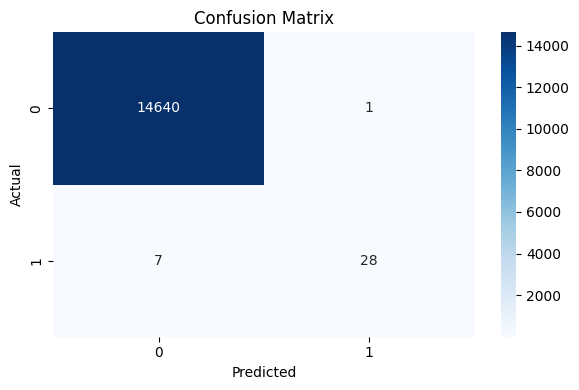

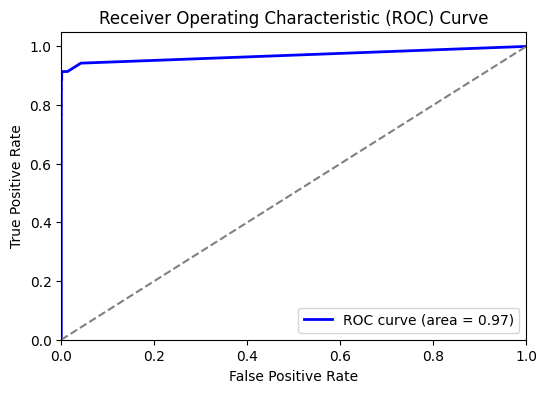

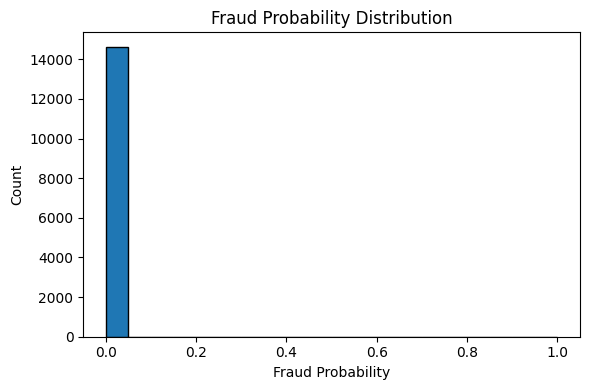

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# FRAUD PROBABILITY HISTOGRAM
plt.figure(figsize=(6,4))
plt.hist(y_proba, bins=20, edgecolor="black")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle NaN values in y_train by dropping corresponding rows from both X_train and y_train
nan_mask_train = y_train.isna()
X_train = X_train[~nan_mask_train]
y_train = y_train[~nan_mask_train]

# Handle NaN values in y_test by dropping corresponding rows from both X_test and y_test
nan_mask_test = y_test.isna()
X_test = X_test[~nan_mask_test]
y_test = y_test[~nan_mask_test]

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (58700, 30)
Testing data shape: (14676, 30)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('passthrough', 'passthrough')
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)
print("✔ Preprocessing pipeline defined with imputation!")

✔ Preprocessing pipeline defined with imputation!


In [ ]:
# The model definition will be moved to cell 3638dec9 to ensure it's defined and trained before use.

In [ ]:
# This cell is redundant, as train/test split will be handled in cell 3638dec9.

In [ ]:
print("Missing values in X before imputation:")
print(X.isnull().sum())

Missing values in X before imputation:
0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
dtype: int64


In [ ]:
# Get column names from the training features
feature_columns = X.columns.tolist()

# Create a sample DataFrame with the correct column names and some dummy values
sample_data = {col: [0.0] for col in feature_columns}
sample = pd.DataFrame(sample_data)

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Fraud Prediction :", pred)
print("Fraud Probability:", prob)


=== SAMPLE PREDICTION ===
Fraud Prediction : 0.0
Fraud Probability: 0.0


In [ ]:
# Get column names from the training features
feature_columns = X.columns.tolist()

# Create a sample DataFrame with the correct column names and some dummy values
sample_data = {col: [0.0] for col in feature_columns}
sample = pd.DataFrame(sample_data)

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Fraud Prediction :", pred)
print("Fraud Probability:", prob)


=== SAMPLE PREDICTION ===
Fraud Prediction : 0.0
Fraud Probability: 0.0


In [ ]:
# Get column names from the training features
feature_columns = X.columns.tolist()

# Create a sample DataFrame with the correct column names and some dummy values
sample_data = {col: [0.0] for col in feature_columns}
sample = pd.DataFrame(sample_data)

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Fraud Prediction :", pred)
print("Fraud Probability:", prob)


=== SAMPLE PREDICTION ===
Fraud Prediction : 0.0
Fraud Probability: 0.0


In [ ]:
print(f"X_train shape before fit: {X_train.shape}")
print(f"y_train shape before fit: {y_train.shape}")

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)
print("✔ Model trained successfully!")

X_train shape before fit: (58700, 30)
y_train shape before fit: (58700,)
✔ Model trained successfully!
